In [254]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [255]:
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

In [256]:
fires = pd.read_csv("/content/modis_2022_India.csv")    #reading the dataset
fires.head(15)    #show the first 15 instances of dataset


,brightness,number22,acq_time,confidence,bright_t31,frp,type
0,313.5,1.0,826.0,61.0,297.6,6.9,0
1,344.5,2.0,1649.0,26.0,290.0,10.2,0
2,316.7,3.0,813.0,62.0,297.3,15.0,0
3,312.0,4.0,545.0,70.0,303.1,10.8,0
4,308.5,5.0,1718.0,70.0,289.6,10.1,0
5,304.9,6.0,534.0,80.0,296.8,29.3,0
6,314.6,7.0,1707.0,51.0,290.5,5.5,0
7,307.9,8.0,521.0,42.0,296.4,8.0,0
8,304.3,9.0,603.0,65.0,299.3,36.7,0
9,351.0,10.0,819.0,64.0,297.7,10.0,0


In [257]:
#generate descriptive statistics of each attribute
fires.describe().T

,count,mean,std,min,25%,50%,75%,max
brightness,363.0,322.590358,12.892102,300.3,313.60,321.3,330.900,386.4
number22,362.0,182.538674,105.800575,1.0,91.25,181.5,274.750,365.0
acq_time,362.0,870.610497,452.874941,421.0,528.00,755.5,845.250,2110.0
confidence,362.0,53.878453,20.237417,0.0,43.00,58.0,68.000,98.0
bright_t31,362.0,296.263812,7.019746,272.8,291.80,296.7,300.875,317.4
frp,362.0,16.284254,15.462712,3.3,7.30,11.3,19.300,158.0
type,363.0,0.011019,0.148249,0.0,0.00,0.0,0.000,2.0


In [258]:
#given area of land burnt, but we have to predict if there is fire or not so changing values of area to 0 and 1 only
#here 0 represet there is not fire and 1 represent fire, changing all values of area which are greater than 0 to 1
fires['type'].values[fires['type'].values > 0] = 1

#renaming the area attribute to output for clear understanding
fires = fires.rename(columns={'type': 'output'})
fires.head(5)

,brightness,number22,acq_time,confidence,bright_t31,frp,output
0,313.5,1.0,826.0,61.0,297.6,6.9,0
1,344.5,2.0,1649.0,26.0,290.0,10.2,0
2,316.7,3.0,813.0,62.0,297.3,15.0,0
3,312.0,4.0,545.0,70.0,303.1,10.8,0
4,308.5,5.0,1718.0,70.0,289.6,10.1,0


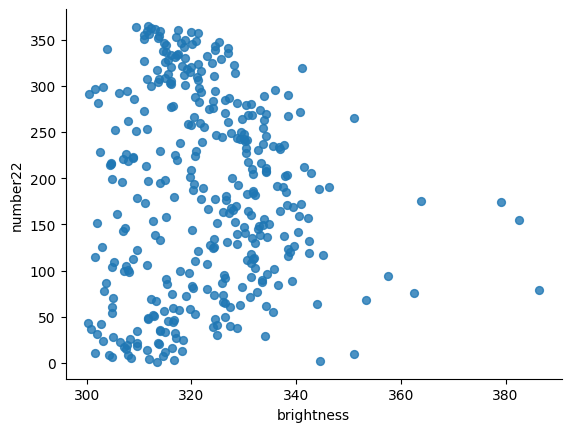

In [259]:
# @title brightness vs number22

from matplotlib import pyplot as plt
fires.plot(kind='scatter', x='brightness', y='number22', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

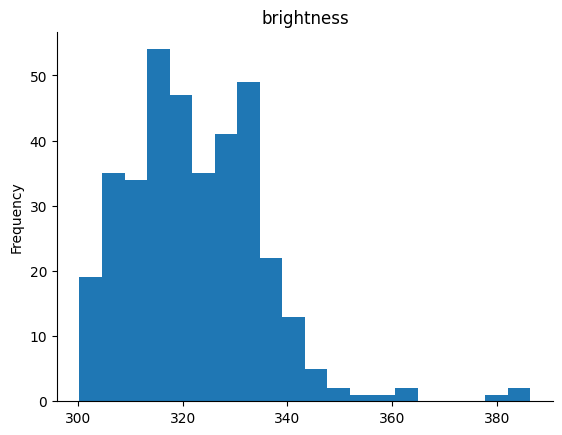

In [260]:
# @title brightness

from matplotlib import pyplot as plt
fires['brightness'].plot(kind='hist', bins=20, title='brightness')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [261]:
#Compute pairwise correlation of columns
fires.corr()


,brightness,number22,acq_time,confidence,bright_t31,frp,output
brightness,1.000000,-0.008818,0.141465,-0.020934,-0.040939,0.043530,0.004681
number22,-0.008818,1.000000,-0.071771,-0.122989,-0.141450,-0.154428,0.034188
acq_time,0.141465,-0.071771,1.000000,0.155767,-0.366920,-0.190422,-0.047896
confidence,-0.020934,-0.122989,0.155767,1.000000,0.287941,0.047150,0.007825
bright_t31,-0.040939,-0.141450,-0.366920,0.287941,1.000000,-0.042485,-0.070854
frp,0.043530,-0.154428,-0.190422,0.047150,-0.042485,1.000000,-0.025507
output,0.004681,0.034188,-0.047896,0.007825,-0.070854,-0.025507,1.000000


In [262]:
#sorting to see which attribute is correlated more to attribut "output"
fires.corr()['output'].sort_values()
#we can see that attribute "month" is the mostly correlated  to attribute "output"

bright_t31   -0.070854
acq_time     -0.047896
frp          -0.025507
brightness    0.004681
confidence    0.007825
number22      0.034188
output        1.000000
Name: output, dtype: float64

In [263]:
from sklearn.preprocessing import StandardScaler
#standardization of data
#removing the mean and scaling it to unit variance
#score=(x-mean)/std
scaler = StandardScaler()
#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(fires.drop('output',axis=1))

scaled_features = scaler.transform(fires.drop('output',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=fires.columns[:-1])
df_feat.head()

,brightness,number22,acq_time,confidence,bright_t31,frp
0,-0.706084,-1.718232,-0.098641,0.352387,0.190610,-0.607736
1,1.701808,-1.708767,1.721153,-1.379476,-0.893548,-0.394024
2,-0.457527,-1.699302,-0.127387,0.401869,0.147815,-0.083170
3,-0.822595,-1.689838,-0.719981,0.797723,0.975199,-0.355167
4,-1.094454,-1.680373,1.873723,0.797723,-0.950609,-0.400500


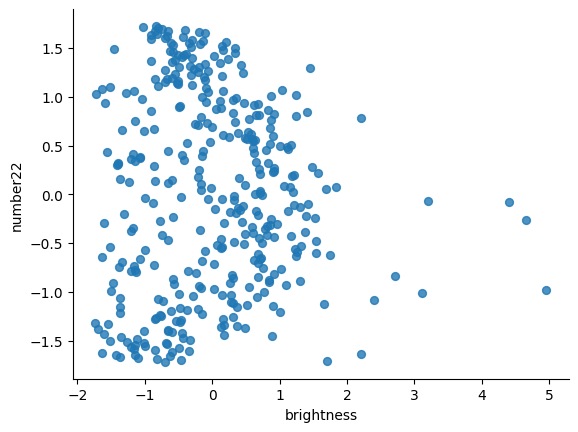

In [264]:
# @title brightness vs number22

from matplotlib import pyplot as plt
df_feat.plot(kind='scatter', x='brightness', y='number22', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [265]:
from sklearn.model_selection import train_test_split
X = df_feat
y = fires['output']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=200)

# Logistic Regression

In [266]:
# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

brightness    0
number22      1
acq_time      1
confidence    1
bright_t31    1
frp           1
dtype: int64


In [267]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [268]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

In [269]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)

# Print the evaluation metrics
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Precision: 0.0
Recall: 0.0
Accuracy: 1.0


## Prediction

In [270]:
#prediction using logistic regression
class_label={1:'There is Fire',0:'There is no fire'}
x_new=[[12, 4, 9 ,11 ,92, 133]]


y_predict=logistic_model.predict(x_new)
print(class_label[y_predict[0]])

There is no fire


# KNN

In [271]:
#importing k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=1)
k_nearest_neighbor_model.fit(X_train,y_train)
pred = k_nearest_neighbor_model.predict(X_test)

Text(0, 0.5, 'Error Rate')

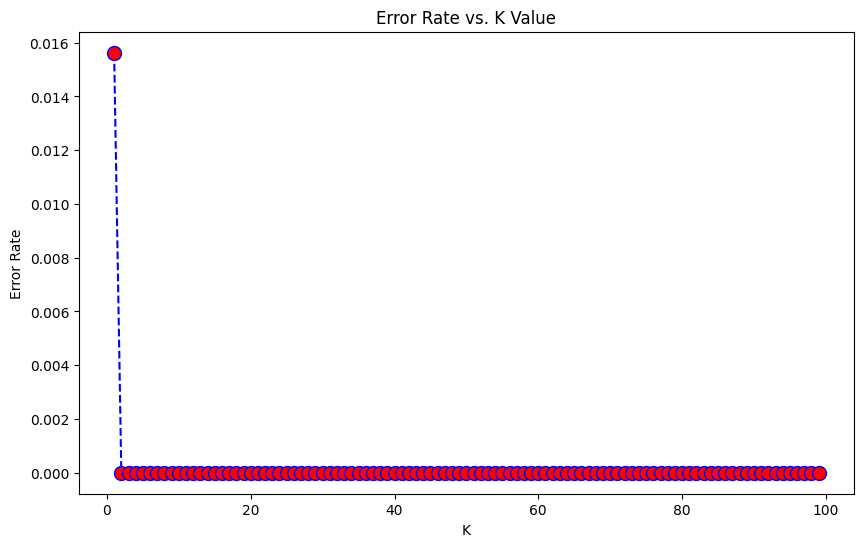

In [272]:
error_rate = []
for i in range(1,100):
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=i)
    k_nearest_neighbor_model.fit(X_train,y_train)
    pred_i = k_nearest_neighbor_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [273]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[128]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



In [274]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[128]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



In [275]:
knn.score(X_test, y_test)

1.0

In [276]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 1.0
Precision: 0.0
Recall: 0.0


## Prediction

In [277]:
#prediction using knn
classes={0:'safe',1:'On Fire'}
x_new=[[12, 4, 9 ,11 ,92, 133]]
y_predict=knn.predict(x_new)
print(classes[y_predict[0]])

safe


# SVM

In [278]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)
X_test = imputer.transform(X_test)

In [279]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [280]:
#prediction using svm
classes={0:'safe',1:'On Fire'}
x_new=[[12, 4, 9 ,11 ,92, 133]]
y_predict=svc.predict(x_new)
print(classes[y_predict[0]])

safe


# Decision Tree

In [253]:
!pip install scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [283]:
import pandas as pd

In [284]:
X = pd.DataFrame(X)

In [285]:
missing_values = X.isnull().sum()
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [286]:
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [288]:
predicted = d_tree.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print("Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Precision:", metrics.precision_score(y_test, predicted))
print("Recall:", metrics.recall_score(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       109
           1       0.00      0.00      0.00         0

    accuracy                           0.99       109
   macro avg       0.50      0.50      0.50       109
weighted avg       1.00      0.99      1.00       109

[[108   1]
 [  0   0]]
Accuracy: 0.9908256880733946
Precision: 0.0
Recall: 0.0


In [289]:
#prediction using decision tree
classes={0:'safe',1:'On Fire'}
x_new=[[12, 4, 9 ,11 ,92, 133]]
y_predict=d_tree.predict(x_new)
print(classes[y_predict[0]])

safe


# Naive Bayes

In [294]:
import pandas as pd

# Convert X to a pandas.DataFrame object
X = pd.DataFrame(X)

# Calculate the sum of missing values for each column
missing_values = X.isnull().sum()

# Print the missing values
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [295]:
X = X.dropna()

In [296]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

In [297]:
# fit a Naive Bayes model to the data
G_NB = GaussianNB()
G_NB.fit(X_train,y_train)

# make predictions
predict = G_NB.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109

[[109]]
Accuracy: 1.0
Precision: 0.0
Recall: 0.0


In [299]:
#prediction using naive bayes
classes={0:'safe',1:'On Fire'}
x_new=[[12, 4, 9 ,11 ,92, 133]]
y_predict=G_NB.predict(x_new)
print(classes[y_predict[0]])

safe


# Random Forest

In [300]:
!pip install scikit-learn

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [304]:
import pandas as pd

# Convert X to a pandas.DataFrame object
X = pd.DataFrame(X)

# Calculate the sum of missing values for each column
missing_values = X.isnull().sum()

# Print the missing values
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [305]:
# Drop rows with missing values
X = X.dropna()
y = y.dropna()

# OR

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

predict = random_forest.predict(X_test)

print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109

[[109]]
Accuracy: 1.0
Precision: 0.0
Recall: 0.0


In [309]:
#prediction using random forest
classes={0:'safe',1:'On Fire'}
x_new=[[1, 3, 4 ,5 ,2, 133]]
y_predict=random_forest.predict(x_new)
print(classes[y_predict[0]])

safe
